In [1]:
%load_ext rpy2.ipython

In [22]:
%%R 
library(ClusterGVis)
library(data.table)
library(tidyverse)
library(data.table)
library(tidyverse)
# library(tidyverse)
library(reshape2)
library("clusterProfiler")
library("org.Hs.eg.db")
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(enrichplot)
library(ggsci)
library(ggrepel)
source("~/mao/Codeman/Project/All_Gao_ScanpyProject/Mainfun.R")

R[write to console]: 
载入程辑包：‘reshape2’


R[write to console]: The following object is masked from ‘package:tidyr’:

    smiths


R[write to console]: The following objects are masked from ‘package:data.table’:

    dcast, melt




In [10]:
%%R
PBMC_tpm=read.csv('/home/maolp/Allcount/Last_All_scanpyData/RNAseq/PBMC_tpm.csv')

rownames(PBMC_tpm)<-PBMC_tpm$X
PBMC_tpm<-PBMC_tpm[,-1]

In [11]:
%%R
head(PBMC_tpm)

            B14.P2    B14.P24    B19.P3    B20.P4    B21.P5      B23.P7
A1BG     0.4084393 14.8148784 3.5782974 16.516900 35.163061 21.65175940
A1BG-AS1 0.0000000  7.3716145 0.2916746  6.832316  6.326848 11.60597258
A1CF     0.0000000  0.0000000 0.0000000  0.000000  0.000000  0.03192179
A2M      1.3151352  1.8269700 1.7377315 22.496361  8.590773 12.64581229
A2M-AS1  0.0000000  1.6278796 0.4989824 12.670090  3.566781  3.93752596
A2ML1    0.2728187  0.1748152 0.1129989  0.000000  0.000000  0.00000000
             B24.P8      B24.P9     B24.P23     B25.P10    B27.P11     B29.P12
A1BG     35.7789574 21.83881335 12.13109464 21.45380036 19.0113022 35.79044692
A1BG-AS1  5.0163225  5.66621642  5.15294413  7.57652760  4.0468595  4.13492869
A1CF      0.0000000  0.00000000  0.00000000  0.00000000  0.0000000  0.02418869
A2M       3.5588250 26.79339945  6.70731134 13.66307690 10.8056939 16.23030780
A2M-AS1   1.8975739  8.24665683  4.71380048  6.59417660  4.2164934  7.76091650
A2ML1     0.1390437  0

In [5]:
%%R
Olinkmeta=read.csv('/home/maolp/data5/Gaofeng_All_matrix/Allcount/Last_All_scanpyData/MetaData/Olinkgene.csv')

In [6]:
%%R
head(Olinkmeta)

   OlinkID UniProt Assay  Gene
1 OID00471  P10145   IL8 CXCL8
2 OID00472  P15692 VEGFA VEGFA
3 OID00474  P80098 MCP-3  CCL7
4 OID00475  P39905  GDNF  GDNF
5 OID00476  Q9H5V8 CDCP1 CDCP1
6 OID00477  Q9BZW8 CD244 CD244


In [40]:
%%R
PBMC_tpmSC=log2(PBMC_tpm[rownames(PBMC_tpm) %in% Olinkmeta$Gene,]+1)

In [41]:
%%R
# PBMC_tpmSC
head(PBMC_tpmSC)
dim(PBMC_tpmSC)
setdiff(Olinkmeta$Gene,rownames(PBMC_tpm))
# head()
head(PBMC_tpmSC)

         B14.P2  B14.P24   B19.P3    B20.P4   B21.P5   B23.P7   B24.P8   B24.P9
ADA   0.2517847 4.895601 2.890778 5.3731103 5.260818 5.139393 4.317992 5.449801
ARTN  0.0000000 0.000000 0.000000 0.1386943 0.000000 0.000000 0.000000 0.000000
AXIN1 2.4145118 4.590799 3.165347 4.7916815 4.145435 4.463892 3.472898 4.269532
CASP8 3.3427790 6.087021 4.159532 6.5295587 6.389069 6.516036 5.764207 6.146579
CCL11 0.0000000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000
CCL13 0.0000000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000
        B24.P23  B25.P10   B27.P11  B29.P12  B31.P13  B32.P14  B33.P15  B34.P16
ADA   5.4519235 5.839664 4.1036924 4.822067 4.444014 5.372682 4.898234 4.802535
ARTN  0.1820547 0.000000 0.4221538 0.000000 0.000000 0.000000 0.000000 0.000000
AXIN1 4.1563896 4.646631 4.8901685 4.102973 4.080919 4.446255 4.624863 4.863178
CASP8 5.6450334 6.139989 6.5643498 6.226081 6.693853 6.515640 6.728773 6.644211
CCL11 0.0000000 0.000000 0.0000000 0.000

In [42]:
%%R

PBMC_tpmSC$OlinkGene=rownames(PBMC_tpmSC)
PBMC_tpmSC %>% head()

         B14.P2  B14.P24   B19.P3    B20.P4   B21.P5   B23.P7   B24.P8   B24.P9
ADA   0.2517847 4.895601 2.890778 5.3731103 5.260818 5.139393 4.317992 5.449801
ARTN  0.0000000 0.000000 0.000000 0.1386943 0.000000 0.000000 0.000000 0.000000
AXIN1 2.4145118 4.590799 3.165347 4.7916815 4.145435 4.463892 3.472898 4.269532
CASP8 3.3427790 6.087021 4.159532 6.5295587 6.389069 6.516036 5.764207 6.146579
CCL11 0.0000000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000
CCL13 0.0000000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000
        B24.P23  B25.P10   B27.P11  B29.P12  B31.P13  B32.P14  B33.P15  B34.P16
ADA   5.4519235 5.839664 4.1036924 4.822067 4.444014 5.372682 4.898234 4.802535
ARTN  0.1820547 0.000000 0.4221538 0.000000 0.000000 0.000000 0.000000 0.000000
AXIN1 4.1563896 4.646631 4.8901685 4.102973 4.080919 4.446255 4.624863 4.863178
CASP8 5.6450334 6.139989 6.5643498 6.226081 6.693853 6.515640 6.728773 6.644211
CCL11 0.0000000 0.000000 0.0000000 0.000

In [43]:
%%R -w 3000 -h 3000 -r 200
PBMC_tpmSC_olink_long<- melt(PBMC_tpmSC, id.vars=c('OlinkGene')) %>% 
mutate(sample_numeric =as.numeric(substring(variable,2,4)))
head(PBMC_tpmSC_olink_long)

  OlinkGene variable     value sample_numeric
1       ADA   B14.P2 0.2517847             14
2      ARTN   B14.P2 0.0000000             14
3     AXIN1   B14.P2 2.4145118             14
4     CASP8   B14.P2 3.3427790             14
5     CCL11   B14.P2 0.0000000             14
6     CCL13   B14.P2 0.0000000             14


In [44]:
%%R -w 3000 -h 3000 -r 200
PBMC_tpmSC_olink_long<- melt(PBMC_tpmSC, id.vars=c('OlinkGene')) %>% 
mutate(sample_numeric =as.numeric(substring(variable,2,4)))
PBMC_tpmSC_olink_longP<- melt(PBMC_tpmSC, id.vars=c('OlinkGene')) %>% 
mutate(sample_numeric = as.numeric(substring(variable,2,4)))%>%
group_by(OlinkGene) %>%
  summarise(r = cor.test(sample_numeric, value,method = "spearman")$estimate,
            p = cor.test(sample_numeric, value,method = "spearman")$p.value)
PBMC_tpmSC_olink_long %>% head()
PBMC_tpmSC_olink_longP %>% head()

# A tibble: 6 × 3
  OlinkGene       r       p
  <chr>       <dbl>   <dbl>
1 ADA        0.0820  0.717 
2 ARTN      -0.0391  0.863 
3 AXIN1      0.0939  0.678 
4 CASP8      0.457   0.0325
5 CCL11     NA      NA     
6 CCL13      0.310   0.160 


In [45]:
%%R
# head(PBMC_tpm_olink_long)
PBMC_tpmSC_olinkRPlong=merge(PBMC_tpmSC_olink_long,Olinkmeta,by.x='OlinkGene',by.y='Gene')
head(PBMC_tpmSC_olinkRPlong)

  OlinkGene variable     value sample_numeric  OlinkID UniProt Assay
1       ADA   B14.P2 0.2517847             14 OID00560  P00813   ADA
2       ADA  B34.P16 4.8025350             34 OID00560  P00813   ADA
3       ADA  B40.P21 4.9857172             40 OID00560  P00813   ADA
4       ADA   B23.P7 5.1393927             23 OID00560  P00813   ADA
5       ADA   B24.P9 5.4498007             24 OID00560  P00813   ADA
6       ADA  B31.P13 4.4440141             31 OID00560  P00813   ADA


In [49]:
%%R
PBMC_tpmSC_olinkRP=merge(PBMC_tpmSC_olink_longP,Olinkmeta,by.x='OlinkGene',by.y='Gene')
write.csv(PBMC_tpmSC_olinkRP,'/home/maolp/Allcount/Last_All_scanpyData/RNAseq/PBMC_SCtpm_olinkRP.csv')

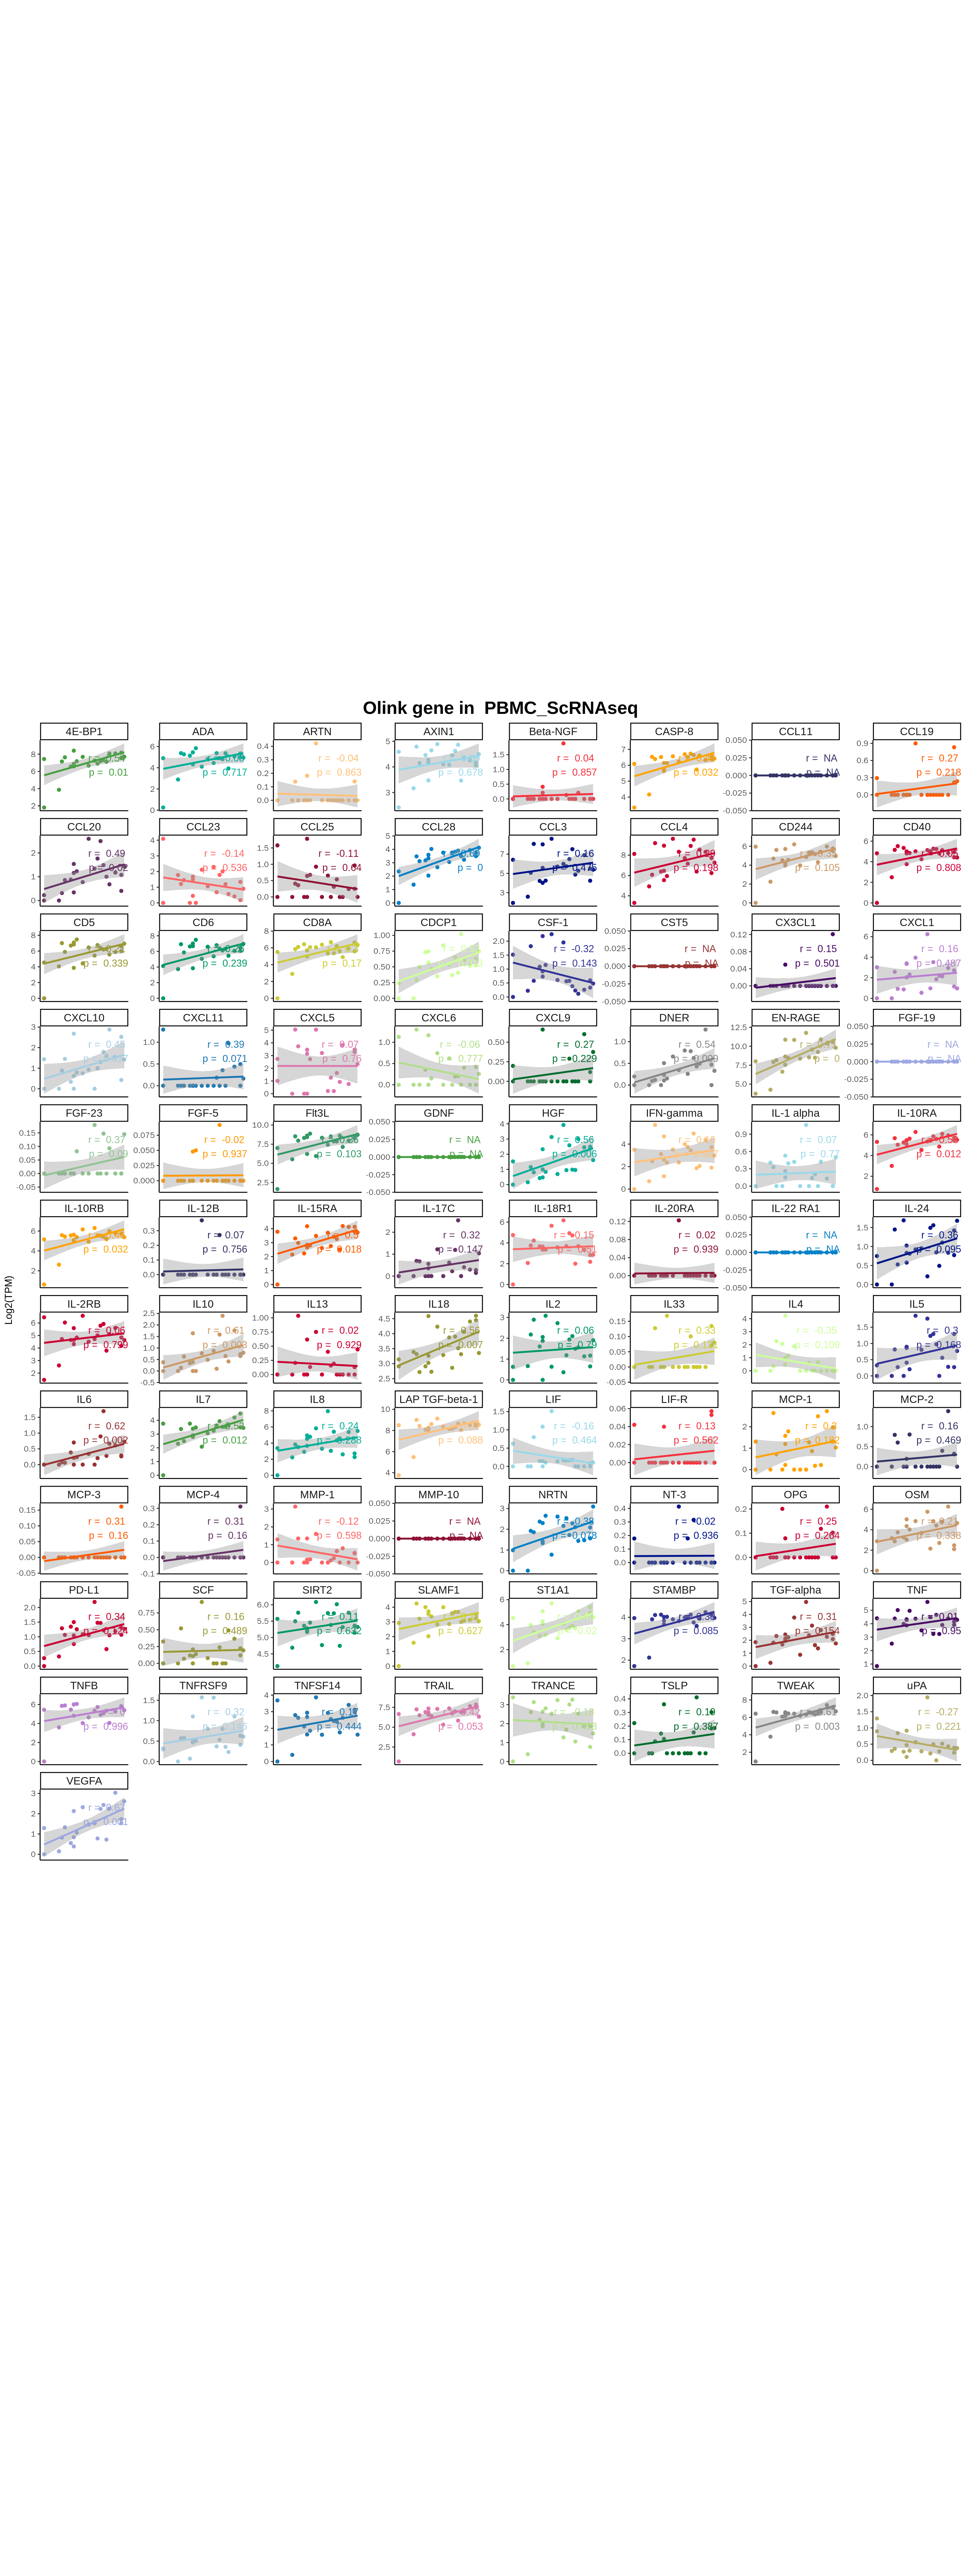

In [66]:
%%R -w 3000 -h 8000 -r 200
colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
colorname3=rep(colorname2,5)
# # Plot
P1=PBMC_tpmSC_olinkRPlong %>%
  ggplot(aes(x = sample_numeric, y = value, color =Assay)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, formula = y ~ x) +
 
  theme_classic() +
  xlab('') +
  scale_x_continuous(breaks = unique(PBMC_tpmSC_olinkRPlong$sample_numeric), labels = unique(PBMC_tpmSC_olinkRPlong$sample_numeric)) +
  facet_wrap(~Assay, scales = "free", labeller = label_value,ncol = 8) +
  theme(  axis.text.x = element_blank(),
        legend.position = "none",  axis.ticks.x = element_blank(),
#          axis.ticks.x = element_blank(),
        strip.text.x = element_text(size = 12),
        strip.text.y = element_text(size = 12),aspect.ratio = 0.8)+ylab('Log2(TPM)')+ 
  geom_text(data =PBMC_tpmSC_olinkRP,
            aes(x = Inf, y = Inf, 
                label = paste("\n","r = ", round(r, 2), "\np = ", round(p, 3))),
            hjust = 1, vjust = 1)+scale_color_manual(values = colorname3)+ggtitle('Olink gene in  PBMC_ScRNAseq')+theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))
P1

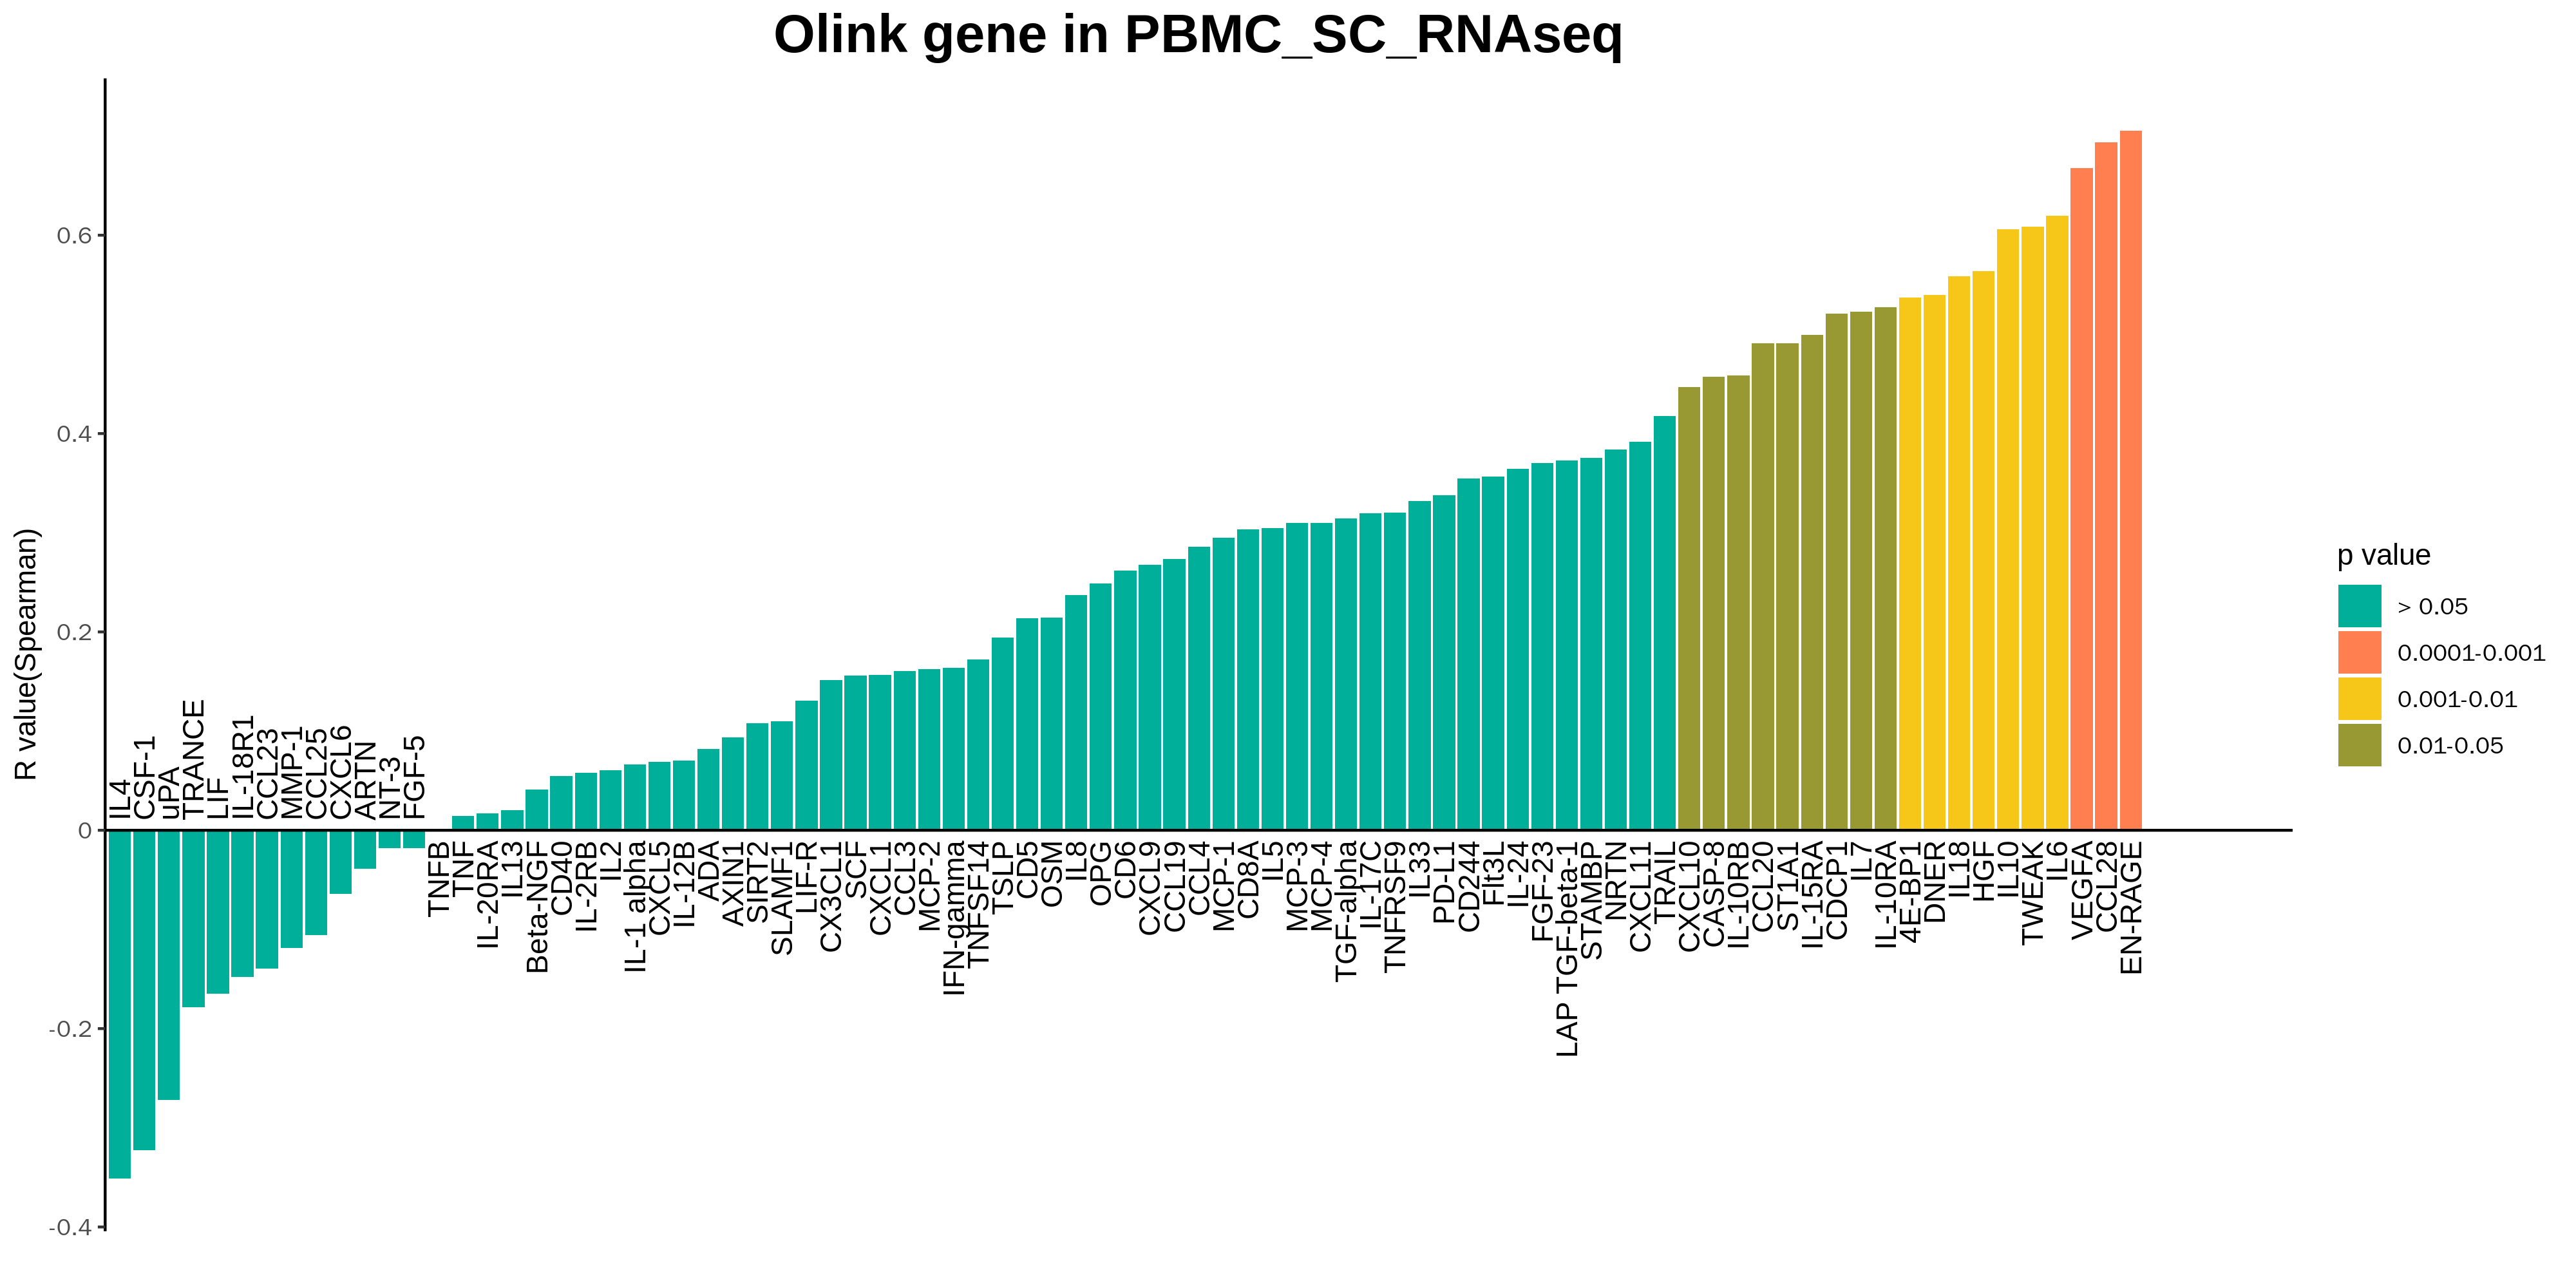

In [65]:
%%R -w 4000 -h 2000 -r 300
create_plot <- function(df) {
  # 创建一个新的分类变量来表示p值的区间
  df$pvalue <- cut(df$p,
                       breaks = c(0, 0.0001, 0.001, 0.01, 0.05, Inf),
                       labels = c('< 0.0001', '0.0001-0.001', '0.001-0.01', '0.01-0.05', '> 0.05'),
                       include.lowest = TRUE)

  # 创建一个颜色向量来为每个p值区间指定颜色
  colors <- c('< 0.0001' = '#F6313E', '0.0001-0.001' = '#FF7F50', '0.001-0.01' = "#f6c619", '0.01-0.05' = "#999933", '> 0.05' = '#00AF99')

  plot <- ggplot(df, aes(x = reorder(Assay, r), y = r, fill = pvalue, label =Assay)) +
    geom_bar(stat = "identity") +
    scale_fill_manual(values = colors) +
    theme_classic() +
    theme(
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      axis.line.x = element_blank(),
      axis.line.y = element_line(color = "black", size = 0.5)
    ) +
    labs(x = "Gene", y = "R value(Spearman)", fill = "p value") +
    geom_hline(yintercept = 0, linetype = "solid", color = "black", size = 0.5) +
    geom_text(aes(y = ifelse(r> 0, -0.01, 0.01), angle = 90), hjust = ifelse(df$r > 0, 1, 0), vjust = 0.5) +
    xlab('')+ scale_y_continuous(breaks = seq(-1,1,0.2),labels = seq(-1, 1, by = 0.2)) 
  
  return(plot)
}

# data = read.table('C:\\Users\\17323\\Documents\\cor.txt', header = T, sep = '\t')
plot <- create_plot(PBMC_tpmSC_olinkRP  )+ggtitle('Olink gene in PBMC_SC_RNAseq')+theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))
print(plot)
# ggsave(plot = plot,'ResultsOlink/Plasma_olink.pdf',width = 16,height = 5)

In [68]:
%%R
ggsave(plot=plot,'/home/maolp/Allcount/Last_All_scanpyData/RNAseq/PBMC_tpmSC_olinkRP.pdf',width=16,height=8)

In [56]:
pwd

'/data1/maolp/Codeman/Project/Main_Gao_ScanpyProject'

In [55]:
# ls

In [69]:
%%R
ggsave(plot=P1,'/home/maolp/Allcount/Last_All_scanpyData/RNAseq/PBMC_tpmSC_olinkall.pdf',width=16,height=20)